<a href="https://colab.research.google.com/github/Soyeon20220610/githubTest/blob/main/planar_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

(2, 400) (1, 400)


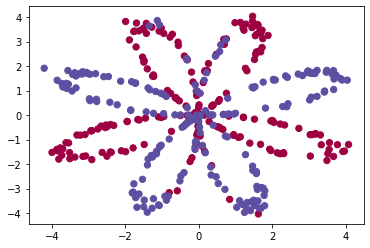

In [5]:
X, Y = load_planar_dataset()
# Visualize the data:
print(X.shape,Y.shape)     # x(2=x1,x2 features,400) y(1, 400)   red=0, blue=1
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


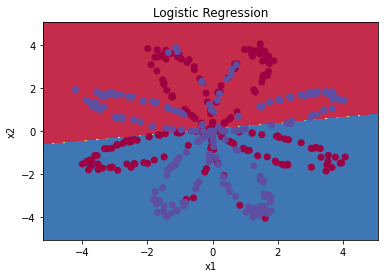

In [7]:
#logistic regression 결과---> linear하기 때문에 에러가 매우 크다

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [8]:
def layer_sizes (X,Y):
  n_x = X.shape[0]
  n_h = 4    #내가 임의로 정해 줌, = hard code
  n_y = Y.shape[0]
  
  return (n_x,n_h,n_y)

In [32]:
def initialize_parameters(n_x,n_h,n_y):
  #크기: (현재 layer = hidden layer, 이전 layer=input layer)
  W1= np.random.randn(n_h,n_x) * 0.01       #input->hidden layer에서 나온 가중치
  b1 = np.zeros((n_h,1))
  #크기: (현재 layer = output layer, 이전 layer = hidden layer)
  W2= np.random.randn(n_y,n_h)*0.01      # hidden layer->output layer 가중치  
  b2 = np.zeros((n_y,1))
  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
  return parameters
  

In [11]:
def forward_propagation(X,parameters):
  W1= parameters["W1"]
  b1= parameters["b1"]
  W2= parameters["W2"]
  b2= parameters["b2"]
        
  Z1= np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)

  assert(A2.shape == (1, X.shape[1]))
    
  cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
  return A2, cache

In [12]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

forward_propagation_test(forward_propagation)

A2 = [[0.21292656 0.21274673 0.21295976]]
All tests passed!


In [13]:
def compute_cost(A2,Y):
  m=Y.shape[1]

  logprobs=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
  cost=-1/m*np.sum(logprobs)
  cost = float(np.squeeze(cost))

  return cost

In [14]:
A2, t_Y = compute_cost_test_case()    # 그냥 시험삼아 해보는 것
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

compute_cost_test(compute_cost)

cost = 0.6930587610394646
All tests passed!


In [19]:
def backward_propagation(parameters,cache,X,Y):
  m=X.shape[1]
  W1= parameters['W1']
  W2=parameters['W2']
  A1= cache["A1"]
  A2= cache["A2"]

  dZ2=A2-Y
  dW2=1/m*np.dot(dZ2,A1.T)
  db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
  dW1=1/m*np.dot(dZ1,X.T)
  db1=1/m*np.sum(dZ1,axis=1,keepdims=True)

    
  grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
  return grads

In [20]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

backward_propagation_test(backward_propagation)

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
All tests passed!


In [21]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1= copy.deepcopy(parameters["W1"])
    b1= parameters["b1"]
    W2= copy.deepcopy(parameters["W2"])
    b2= parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [22]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

update_parameters_test(update_parameters)

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
All tests passed!


In [26]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
  np.random.seed(3)
  n_x = layer_sizes(X,Y)[0]
  n_y = layer_sizes(X,Y)[2]

  parameters = initialize_parameters(n_x,n_h,n_y)

  #gradient descent

  for i in range(0,num_iterations):
    A2,cache = forward_propagation(X,parameters)   # 이미 가중치 아니까 a2=y_predict를 함수 하나로 구할 수 있음
    cost = compute_cost(A2,Y)
    grads = backward_propagation(parameters,cache,X,Y)
    parameters = update_parameters(parameters,grads, learning_rate=1.2)
    if print_cost and i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
  return parameters




In [28]:
def predict(parameters,X):
  A2,cache = forward_propagation(X,parameters)
  predictions = A2>0.5         #A2>0.5 이면 prediction=1 아니면 0

  return predictions

In [29]:
parameters, t_X = predict_test_case()

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))

predict_test(predict)

Predictions: [[ True False  True]]
All tests passed!


Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220621
Cost after iteration 8000: 0.219414
Cost after iteration 9000: 0.218527


Text(0.5, 1.0, 'decision boundary for hidden layer size4')

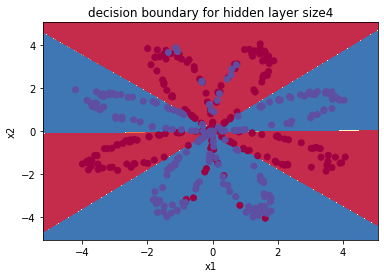

In [33]:
parameters = nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T),X,Y)
plt.title('decision boundary for hidden layer size'+str(4))

In [34]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 91.0 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.0 %
Accuracy for 20 hidden units: 90.75 %
Accuracy for 50 hidden units: 91.5 %


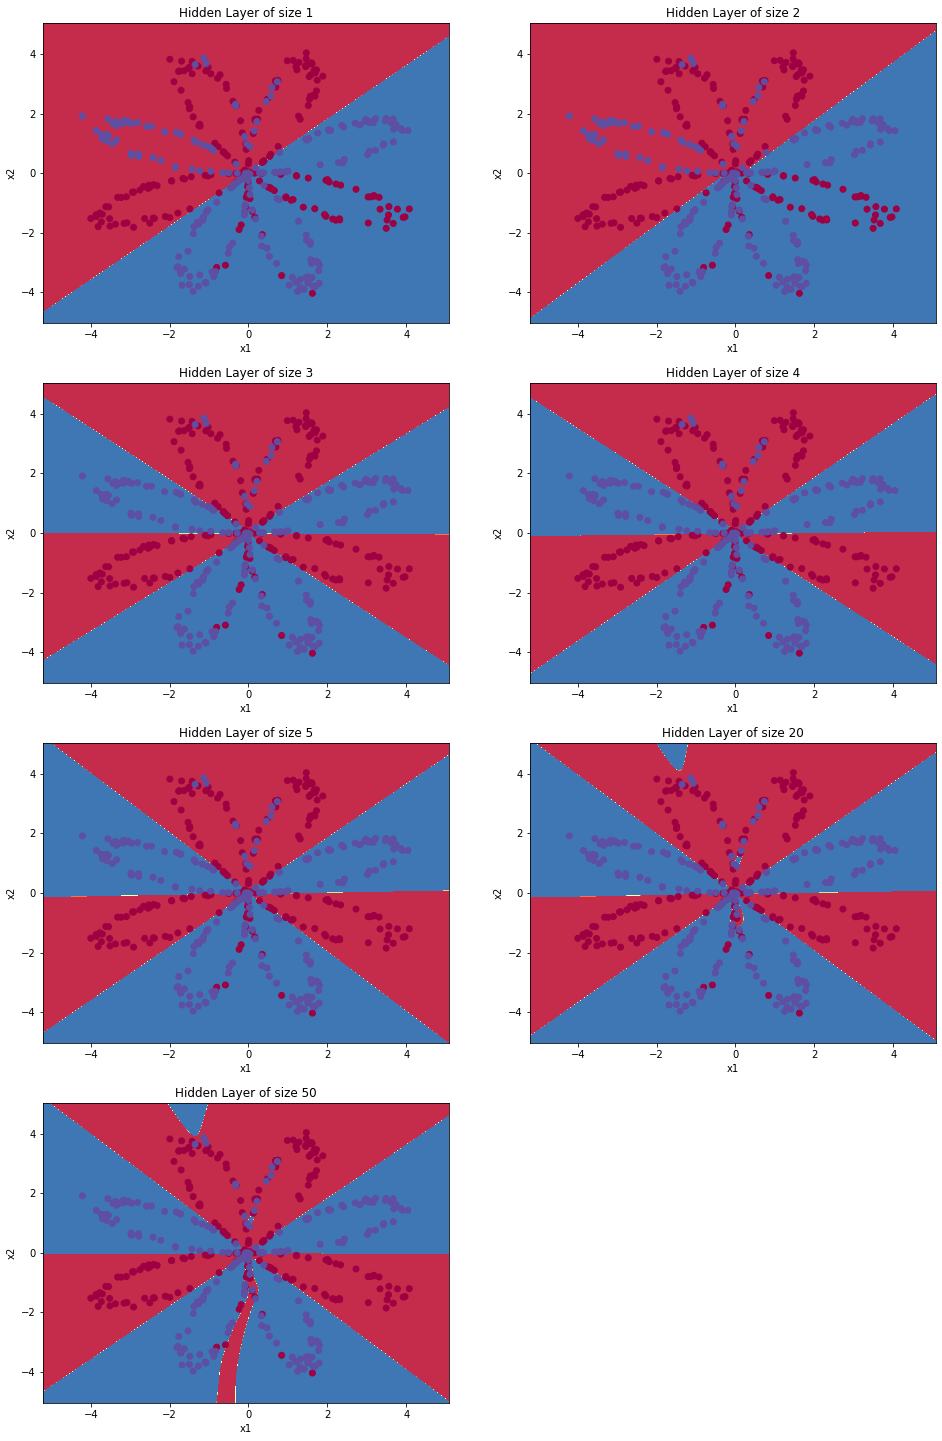

In [36]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

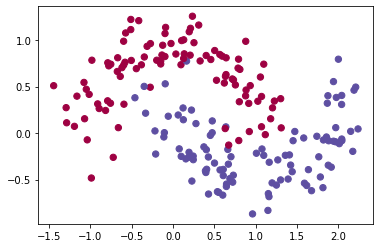

In [37]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);